In [29]:
%matplotlib inline

# Import dependencies
import os, quandl, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from scipy import stats
from __future__ import print_function
from statsmodels.graphics.api import qqplot
import os, quandl, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [30]:
# Firstly: Get data from Quandl
# What is Quandl? It is a marketplace for financial, economic and alternative data 
# delivered in modern formats for today's analysts, including Python.

def get_data(quandl_id):
    '''Download and cache Quandl dataseries'''
    cache_path = '{}.pkl'.format(quandl_id).replace('/','-')
    print cache_path
    try:
        f = open(cache_path, 'rb')
        df = pickle.load(f)   
        print('Loaded {} from cache'.format(quandl_id))
    except (OSError, IOError) as e:
        print('Downloading {} from Quandl'.format(quandl_id))
        df = quandl.get(quandl_id, returns="pandas")
        df.to_pickle(cache_path)
        print('Cached {} at {}'.format(quandl_id, cache_path))
    return df

SyntaxError: invalid syntax (<ipython-input-30-fd841996bb2c>, line 8)

In [31]:
# Get Bitcoin Data
gdax_btc_eur = get_data('GDAX/EUR')
# Starting in June 2017 until September 2017
gdax_btc_eur = gdax_btc_eur['2017-06':'2017-09']

NameError: name 'get_data' is not defined

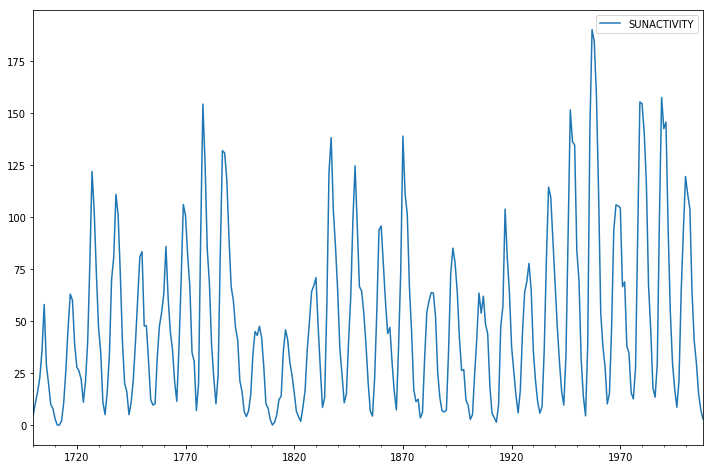

In [19]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

dta.plot(figsize=(12,8));



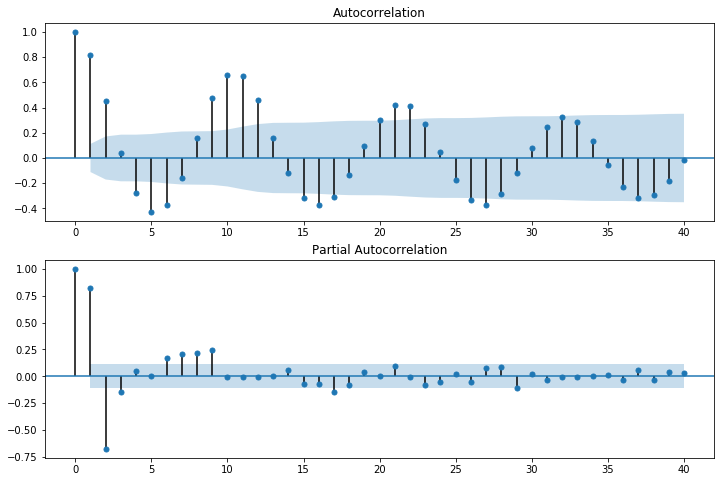

In [15]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

const                49.659374
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64
2622.63633806 2637.56970317 2628.60672591
const                49.749873
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129649
dtype: float64
2619.4036287 2638.07033508 2626.8666135


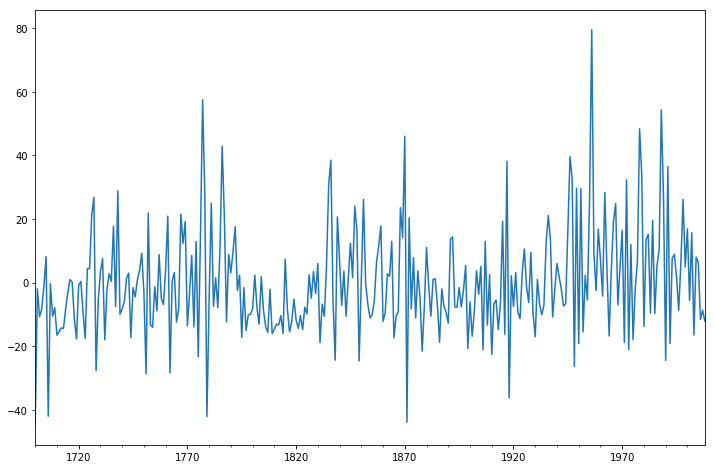

In [16]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)

arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

print(arma_mod30.params)

print(arma_mod30.aic, arma_mod30.bic, arma_mod30.hqic)

sm.stats.durbin_watson(arma_mod30.resid.values)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

